# Cara install

In [7]:
# jangan install tensorflow, installnya tensorflow-gpu
# pakai python 3.6.8
%pip install tensorflow-gpu==1.5 numpy pandas scikit-learn keras matplotlib

  Using cached https://files.pythonhosted.org/packages/eb/38/ac33370d784287baa1c3d538978b5e2ea064d4c1b93ffbd12826c190dd10/pytz-2025.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.Collecting kiwisolver>=1.0.1 (from matplotlib)



You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Cek GPU

In [1]:
import tensorflow as tf
print(tf.test.gpu_device_name())

c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\a

/device:GPU:0


In [ ]:
import tensorflow as tf

with tf.device("/device:GPU:0"):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)
    print(c)


Tensor("MatMul_2:0", shape=(2, 2), dtype=float32, device=/device:GPU:0)


In [11]:
import tensorflow as tf

print(tf.test.is_gpu_available())

True


In [ ]:
import tensorflow as tf

# Cek apakah TensorFlow benar-benar menggunakan GPU
with tf.device("/device:GPU:0"):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    c = tf.matmul(a, b)  # Operasi matrix multiplication

    with tf.Session() as sess:
        result = sess.run(c)
        print("Hasil operasi di GPU:", result)


Hasil operasi di GPU: [[19. 22.]
 [43. 50.]]


In [8]:
import tensorflow as tf

# Cek daftar perangkat yang tersedia
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# Pastikan TensorFlow pakai GPU
if tf.test.is_gpu_available():
    print("✅ TensorFlow sudah menggunakan GPU")
else:
    print("❌ TensorFlow masih pakai CPU")


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5985848591234760608
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 262412699
locality {
  bus_id: 1
}
incarnation: 6655274416310397035
physical_device_desc: "device: 0, name: GeForce GT 730M, pci bus id: 0000:03:00.0, compute capability: 3.5"
]
✅ TensorFlow sudah menggunakan GPU


In [9]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.test.is_gpu_available())
print("Devices available:", tf.Session().list_devices())

TensorFlow version: 1.5.0
GPU Available: True
Devices available: [_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456), _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 262412699)]


In [ ]:
import tensorflow as tf

# Cek apakah GPU tersedia
print("Apakah GPU tersedia?", tf.test.is_gpu_available())

# Menampilkan daftar perangkat yang tersedia
from tensorflow.python.client import device_lib
print("Daftar perangkat yang terdeteksi:")
print(device_lib.list_local_devices())


Apakah GPU tersedia? True
Daftar perangkat yang terdeteksi:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10857379069640336798
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 155130267
locality {
  bus_id: 1
}
incarnation: 7172878288344392020
physical_device_desc: "device: 0, name: GeForce GT 730M, pci bus id: 0000:03:00.0, compute capability: 3.5"
]


In [ ]:
import tensorflow as tf

# Dapatkan konfigurasi perangkat dari TensorFlow
devices = tf.Session().list_devices()
cpu_info = [device for device in devices if 'CPU' in device.name]
gpu_info = [device for device in devices if 'GPU' in device.name]

print("Informasi CPU:")
print(cpu_info)

print("Informasi GPU:")
print(gpu_info)

# Informasi jumlah core CPU
print(f"Jumlah core CPU: {cpu_cores}")
print(f"Jumlah GPU: {len(gpu_info)}")
print(f"CUDA GPU: {tf.test.is_built_with_cuda()}")
print(f"Jumlah CUDA GPU: {len(gpu_info)}")


Informasi CPU:
[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456)]
Informasi GPU:
[_DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 155130267)]
Jumlah core CPU: 4
Jumlah GPU: 1
CUDA GPU: True
Jumlah CUDA GPU: 1


# Klasifikasi AND dengan GPU

In [5]:
import tensorflow as tf
import time

# Cek apakah GPU tersedia
print("GPU Available:", tf.test.is_gpu_available())

# Pastikan TensorFlow menggunakan GPU
with tf.device('/GPU:0'):
    a = tf.constant([[2.0, 3.0], [4.0, 5.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0]])

    start = time.time()
    result = tf.matmul(a, b)  # Operasi perkalian matriks
    end = time.time()

    print("Hasil Perhitungan:", result)
    print(f"Waktu Eksekusi: {end - start:.6f} detik")


GPU Available: True
Hasil Perhitungan: Tensor("MatMul_1:0", shape=(2, 2), dtype=float32, device=/device:GPU:0)
Waktu Eksekusi: 0.002998 detik


In [13]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import ModelCheckpoint

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Cek versi TensorFlow
print("TensorFlow version:", tf.__version__)

# Definisi model
model = Sequential(
    [
        Dense(4, input_dim=2, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Kompilasi model
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

# Callback untuk menyimpan model terbaik
checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="accuracy", save_best_only=True, mode="max"
)

# Konfigurasi sesi TensorFlow untuk menggunakan GPU jika tersedia
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # Memungkinkan penggunaan GPU secara dinamis
session = tf.Session(config=config)

# Cek apakah GPU tersedia
device_name = "/device:GPU:0"

try:
    with tf.device(device_name):
        print("Training menggunakan GPU")
        with session.as_default():
            model.fit(x, y, epochs=100, verbose=1, callbacks=[checkpoint])
except RuntimeError as e:
    print("Gagal menggunakan GPU, menggunakan CPU sebagai fallback.")
    print("Error:", e)
    with session.as_default():
        model.fit(x, y, epochs=100, verbose=1, callbacks=[checkpoint])


TensorFlow version: 1.5.0
Training menggunakan GPU
Epoch 1/100
4/4 [==============================]4/4 [==============================] - 1s 187ms/step - loss: 0.7119 - acc: 0.5000

Epoch 2/100
4/4 [==============================]4/4 [==============================] - 0s 5ms/step - loss: 0.7109 - acc: 0.5000

Epoch 3/100
4/4 [==============================]4/4 [==============================] - 0s 4ms/step - loss: 0.7098 - acc: 0.5000

Epoch 4/100
4/4 [==============================]4/4 [==============================] - 0s 4ms/step - loss: 0.7087 - acc: 0.5000

Epoch 5/100
4/4 [==============================]4/4 [==============================] - 0s 7ms/step - loss: 0.7076 - acc: 0.5000

Epoch 6/100
4/4 [==============================]4/4 [==============================] - 0s 5ms/step - loss: 0.7065 - acc: 0.5000

Epoch 7/100
4/4 [==============================]4/4 [==============================] - 0s 6ms/step - loss: 0.7054 - acc: 0.5000

Epoch 8/100
4/4 [===========================

In [13]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import ModelCheckpoint

# Define the model
model = Sequential(
    [
        Dense(4, input_dim=2, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

# Define model checkpoint callback
checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="accuracy", save_best_only=True, mode="max"
)

# Fit the model using CPU
with tf.device("/cpu:0"):
    model.fit(x, y, epochs=1000, verbose=1, callbacks=[checkpoint])

Epoch 1/1000
4/4 [==============================]4/4 [==============================] - 0s 88ms/step - loss: 0.6948 - acc: 0.7500

Epoch 2/1000
4/4 [==============================]4/4 [==============================] - 0s 5ms/step - loss: 0.6942 - acc: 0.7500

Epoch 3/1000
4/4 [==============================]4/4 [==============================] - 0s 17ms/step - loss: 0.6933 - acc: 0.7500

Epoch 4/1000
4/4 [==============================]4/4 [==============================] - 0s 6ms/step - loss: 0.6924 - acc: 0.7500

Epoch 5/1000
4/4 [==============================]4/4 [==============================] - 0s 6ms/step - loss: 0.6915 - acc: 0.7500

Epoch 6/1000
4/4 [==============================]4/4 [==============================] - 0s 14ms/step - loss: 0.6907 - acc: 0.7500

Epoch 7/1000
4/4 [==============================]4/4 [==============================] - 0s 4ms/step - loss: 0.6898 - acc: 0.7500

Epoch 8/1000
4/4 [==============================]4/4 [==============================] -

In [14]:
z = np.array([[1, 0]])
predictions = model.predict(x)
print("Prediksi:")
print(predictions)

Prediksi:
[[0.21665989]
 [0.28373137]
 [0.32893437]
 [0.4131659 ]]


In [15]:
binary_predictions = (predictions > 0.5).astype(int)
print("Prediksi:")
print(binary_predictions)

Prediksi:
[[0]
 [0]
 [0]
 [0]]


# Disini mulai Klasifikasi CNN dengan GPU NVIDIA 730M

In [1]:
import tensorflow as tf
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import ModelCheckpoint
import time


# # Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# # Normalisasi data ke range 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# # Konversi label ke one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# # Model CNN untuk CIFAR-10
def create_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )
    return model

# # Kompilasi model
model = create_model()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# # Define model checkpoint callback
checkpoint = ModelCheckpoint("model_CNN_NVIDIA_GT730M.h5", monitor="val_acc", save_best_only=True, mode="max")

# # # Jalankan training di GPU jika tersedia
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\anfiniti\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\a

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
with tf.device("/job:localhost/replica:0/task:0/device:GPU:0"):
    print('Training menggunakan GPU...')
    start_time = time.time()
    history = model.fit(
        x_train,
        y_train,
        epochs=5,
        batch_size=64,
        validation_data=(x_test, y_test),
        callbacks=[checkpoint],
        verbose=1,
    )
    end_time = time.time()
    print(f"Waktu yang dibutuhkan untuk 1 epoch: {end_time - start_time:.2f} detik")


Training menggunakan GPU...
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================]50000/50000 [==============================] - 55s 1ms/step - loss: 0.6806 - acc: 0.7595 - val_loss: 0.8849 - val_acc: 0.6995

Epoch 2/5
50000/50000 [==============================]50000/50000 [==============================] - 52s 1ms/step - loss: 0.6093 - acc: 0.7867 - val_loss: 0.8788 - val_acc: 0.7028

Epoch 3/5
50000/50000 [==============================]50000/50000 [==============================] - 55s 1ms/step - loss: 0.5459 - acc: 0.8073 - val_loss: 0.8753 - val_acc: 0.7152- 46592/50000 [==========================>...] - ETA: 3s - loss: 0.5472  - ETA:

Epoch 4/5
50000/50000 [==============================]50000/50000 [==============================] - 53s 1ms/step - loss: 0.4886 - acc: 0.8256 - val_loss: 0.9132 - val_acc: 0.7116

Epoch 5/5
50000/50000 [==============================]50000/50000 [==============================] - 55s 1ms/step - los

In [4]:
# Load model from checkpoint model_CNN_NVIDIA_GT730M.h5 atau hasil dari GPU
model.load_weights("model_CNN_NVIDIA_GT730M.h5")

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Akurasi pada dataset uji:", test_acc)

10000/10000 [==============================]10000/10000 [==============================] - 8s 785us/step

Akurasi pada dataset uji: 0.7152


In [5]:
# Mencari epoch dengan akurasi validasi terbaik
best_epoch = max(enumerate(history.history["val_acc"]), key=lambda x: x[1])

# Menampilkan epoch terbaik
print(
    f"Epoch terbaik: {best_epoch[0] + 1} dengan akurasi validasi: {best_epoch[1]:.4f}"
)


Epoch terbaik: 3 dengan akurasi validasi: 0.7152


Matplotlib is building the font cache; this may take a moment.


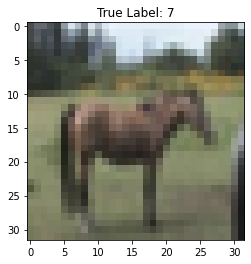

Predicted Label: 7


In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Select a single image from the test set
index = 9999  # Change this index to test different images
test_image = x_test[index]
test_label = y_test[index]

# Display the image
plt.imshow(test_image)
plt.title(f"True Label: {np.argmax(test_label)}")
plt.show()

# Preprocess the image
test_image = np.expand_dims(test_image, axis=0)

# Predict the label of the image
predicted_label = model.predict(test_image)
predicted_class = np.argmax(predicted_label)

print(f"Predicted Label: {predicted_class}")